In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()
df.keys()
dataset=pd.DataFrame(df)
dataset.head()
dataset.shape
dataset.info()
dataset.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
dataset.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [10]:
dataset.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
dataset.corr(numeric_only=True)


,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [12]:
sns.pairplot(df)

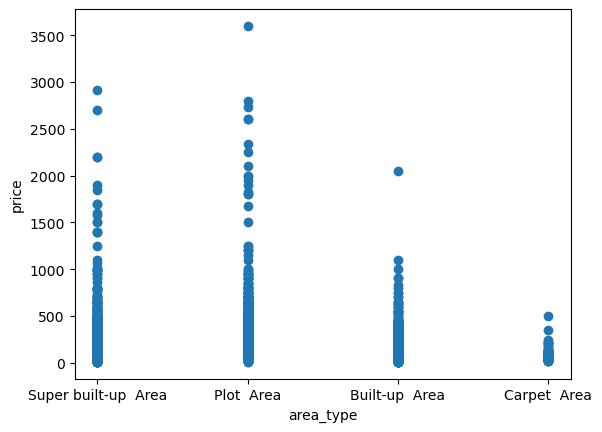

In [32]:
plt.scatter(df['area_type'], df['price'])
plt.xlabel("area_type")
plt.ylabel("price")
plt.show()

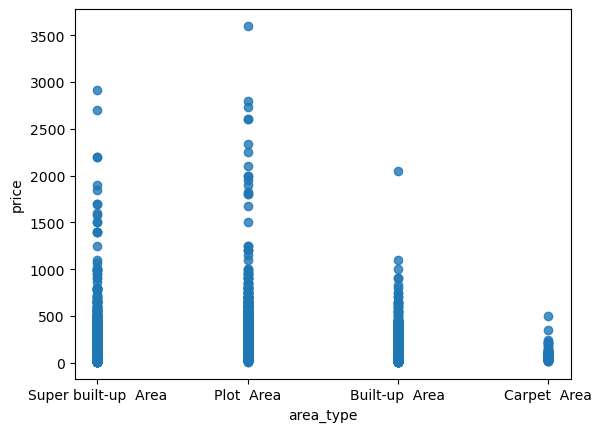

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [39]:
sns.regplot(x='area_type', y='price', data=df, fit_reg=False)
plt.show()
df


In [13]:
df.drop(columns=[col for col in ['area_type', 'availability', 'society'] if col in df.columns], inplace=True)
df.dropna(inplace=True)
df
location_stats=df.groupby('location')['location'].agg('count').sort_values(ascending=False)#used for sorting the dataset
location_stats
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10
df['location']=df['location'].apply(lambda x:x.strip())
df.location.value_counts()
location_stats_less_than_10
df['location']=df['location'].apply(lambda x:'other' if x in location_stats_less_than_10 else x)
df['location'].value_counts()
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [14]:
df['bedrooms'] = df['size'].apply(lambda x:int(x.split(' ')[0]))
df

,location,size,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [15]:
df.total_sqft.unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def clean(sqft):# Function to clean the total_sqft column
    if isinstance(sqft, str):
        tokens = sqft.split('-')
        if len(tokens) == 2:
            try:
                return (float(tokens[0]) + float(tokens[1])) / 2
            except:
                return None
        try:
            return float(sqft)
        except:
            return None
    elif isinstance(sqft, (int, float)):
        return sqft
    return None


In [17]:
df['total_sqft'] = df['total_sqft'].apply(clean)
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [18]:
df.describe()
df.dropna(inplace=True)
df

,location,size,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4


In [77]:
df['sqft_per_bed']=df['total_sqft']/df['bedrooms']
df['sqft_per_bed'].describe()

count    12668.000000
mean       570.060291
std        380.298999
min          0.714286
25%        473.333333
50%        550.000000
75%        622.500000
max      26136.000000
Name: sqft_per_bed, dtype: float64

In [20]:
df2=df[df['sqft_per_bed']>=300]

In [21]:
df2

,location,size,total_sqft,bath,balcony,price,bedrooms,sqft_per_bed
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,528.000000
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,650.000000
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,480.000000
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,507.000000
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,600.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,571.666667
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,690.600000
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,570.500000
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,1172.250000


In [22]:
df2['price_per_sqft'] = df2['price'] * 100000/ df2['total_sqft']#here we are calculating price per sqft

C:\Users\JOYDEEP PAUL\AppData\Local\Temp\ipykernel_64312\2061834619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_per_sqft'] = df2['price'] * 100000/ df2['total_sqft']#here we are calculating price per sqft


In [78]:
df2

,location,size,total_sqft,bath,balcony,price,bedrooms,sqft_per_bed,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,528.000000,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,650.000000,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,480.000000,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,507.000000,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,600.000000,4250.000000
...,...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,571.666667,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,690.600000,6689.834926
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,570.500000,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,1172.250000,10407.336319


In [24]:
df2.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
df3=df2[df2['price_per_sqft']>=2000]
df3

,location,size,total_sqft,bath,balcony,price,bedrooms,sqft_per_bed,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,528.000000,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,650.000000,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,480.000000,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,507.000000,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,600.000000,4250.000000
...,...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,571.666667,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,690.600000,6689.834926
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,570.500000,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,1172.250000,10407.336319


In [43]:
df3.drop(columns=['size', 'sqft_per_bed','price_per_sqft'],axis=1, inplace=True)

C:\Users\JOYDEEP PAUL\AppData\Local\Temp\ipykernel_64312\1251745921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(columns=['size', 'sqft_per_bed','price_per_sqft'],axis=1, inplace=True)


In [44]:
df3

,location,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [79]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Assuming df3 is your original DataFrame
df3['location'] = df3['location'].str.strip().str.replace(',', '', regex=False)

# Input and Output separation
data_input = df3.drop(columns=['price']).copy()
data_output = df3['price']

# Recalculate 'sqft_per_bed'
data_input['sqft_per_bed'] = data_input['total_sqft'] / data_input['bedrooms']

# Define feature lists
categorical_cols = ['location']
numerical_cols = ['total_sqft', 'bath', 'balcony', 'bedrooms', 'sqft_per_bed']

# ColumnTransformer with OneHotEncoder and StandardScaler
col_trans = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(with_mean=False), numerical_cols)
])

# Create pipeline
model = make_pipeline(col_trans, LinearRegression())

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.2, random_state=42)

# Fit the model
model.fit(x_train, y_train)

# Evaluate the model
score = model.score(x_test, y_test)
print("Model R² Score:", score)
score


Model R² Score: 0.6755767681823628


C:\Users\JOYDEEP PAUL\AppData\Local\Temp\ipykernel_64312\3673535967.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['location'] = df3['location'].str.strip().str.replace(',', '', regex=False)


0.6755767681823628

In [110]:
# Create input DataFrame
input = pd.DataFrame([['Electronic City Phase II', 1500.0, 3.0, 2.0, 3]],columns=['location', 'total_sqft', 'bedrooms', 'bath', 'balcony'])

# Add the derived feature 'sqft_per_bed'
input['sqft_per_bed'] = input['total_sqft'] / input['bedrooms']

# Predict
prediction = model.predict(input)
print("Predicted Price:", prediction[0])


Predicted Price: 60.52001682990223


In [114]:
df.head()
model


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location']),
                                                 ('num',
                                                  StandardScaler(with_mean=False),
                                                  ['total_sqft', 'bath',
                                                   'balcony', 'bedrooms',
                                                   'sqft_per_bed'])])),
                ('linearregression', LinearRegression())])

In [111]:
import pickle as pk
pk.dump(model, open('house_price_model.pkl', 'wb'))  # Save the model to a file
df3.to_csv('cleaned_house_price_data.csv')  # Save the cleaned data to a CSV file

In [116]:
import matplotlib.pyplot as plt

# Use the fitted pipeline model to make predictions
reg_pred = model.predict(x_test)

# Now you can plot or inspect predictions
print(reg_pred)

# (Optional) If you want to compare with actual:
# plt.scatter(y_test, reg_pred)
# plt.xlabel("Actual Prices")
# plt.ylabel("Predicted Prices")
# plt.title("Actual vs Predicted")
# plt.show()


[84.14309737 49.52635891 37.61516838 ... 67.05885004 56.11533075
 42.82542334]


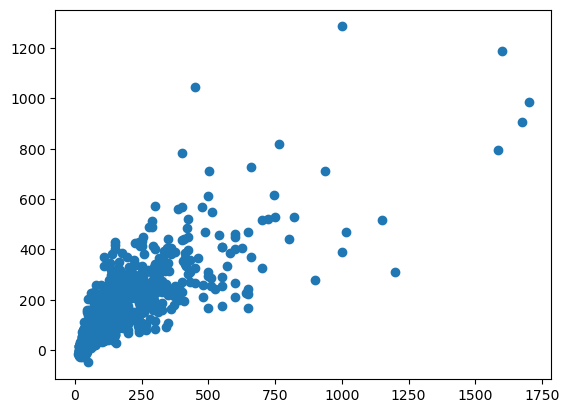

In [128]:
plt.scatter(y_test, reg_pred)

plt.show()

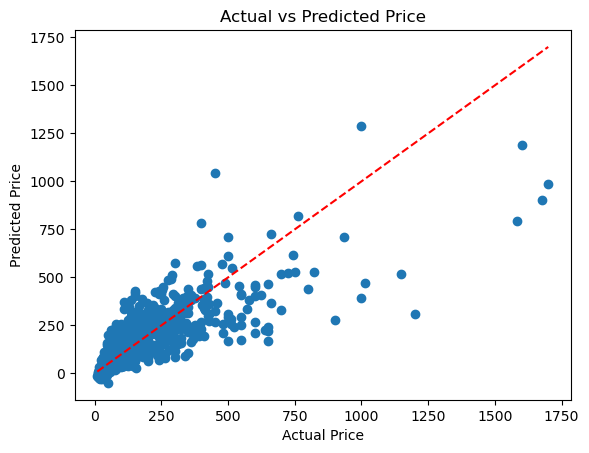

In [121]:
plt.scatter(y_test, reg_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal fit line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()


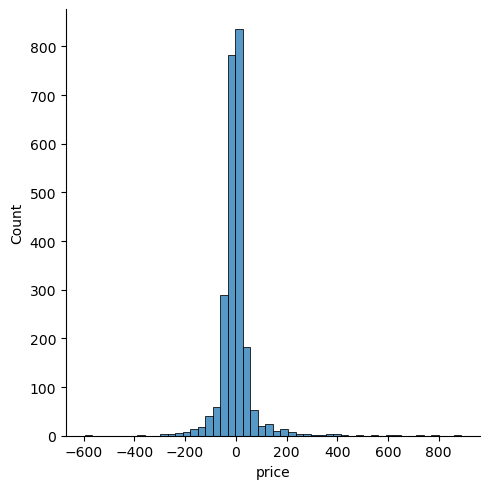

In [129]:
sns.displot(y_test - reg_pred, bins=50)
plt.show()